# K-Nearest Neighbors

In [29]:
from sklearn.datasets import load_iris

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dataset = load_iris()
X = dataset.data
y = dataset.target
print(X.shape, y.shape)

(150, 4) (150,)


In [9]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
y[:5]

array([0, 0, 0, 0, 0])

In [11]:
X = (X - X.min()) / (X.max() - X.min())
X[:5]

array([[0.64102564, 0.43589744, 0.16666667, 0.01282051],
       [0.61538462, 0.37179487, 0.16666667, 0.01282051],
       [0.58974359, 0.3974359 , 0.15384615, 0.01282051],
       [0.57692308, 0.38461538, 0.17948718, 0.01282051],
       [0.62820513, 0.44871795, 0.16666667, 0.01282051]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

# Model

In [14]:
model = KNeighborsClassifier(
    n_neighbors=5
)

In [15]:
model

KNeighborsClassifier()

In [16]:
model.fit(X_train, y_train)

KNeighborsClassifier()

# Evaluation

In [20]:
model.score(X_test, y_test)

0.9777777777777777

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_pred[:5]

array([2, 2, 1, 1, 0])

In [23]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[17,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 17]], dtype=int64)

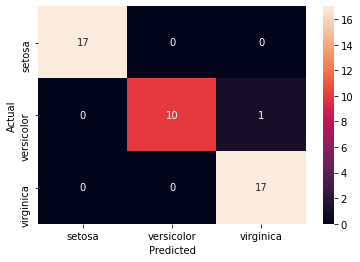

In [27]:
sns.heatmap(
    cm,
    annot=True,
    fmt='.0f',
    xticklabels=dataset.target_names,
    yticklabels=dataset.target_names
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.91      0.95        11
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

